additional pacakge needed: wordcloud, gensim, seaborn(?), PIL

# importing the dataframe

In [1]:
import pandas as pd
import numpy as np

In [17]:
comp_sentences_df = pd.read_csv('./comp_sentences.csv',index_col=0)

In [18]:
comp_sentences_df.head()

,id,thread_title,reply_split,classification
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,1
1,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,2
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,For my style I really prefer T64fx than T05fx ...,1
3,5f686bdbb59794ca78c7090b,Tenergy 05 vs Tenergy 80,If you loop everything and are active in the s...,2
4,5f686bdbb59794ca78c7090b,Tenergy 05 vs Tenergy 80,If you block more and are a bit more passive i...,2


# Wordcloud

In [22]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
# from wordcloud import STOPWORDS

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud


def get_stopwords():
    # stop = set(STOPWORDS)
    stop = stopwords.words('english')
    custom_words_sen = 'really, like, way, much , still, but, find, need, you, many, lot, always, say, could, well, even, the'

    custom_words = custom_words_sen.split(', ')

    custom_stop = stop + custom_words
    return custom_stop

def preprocess_news(df,lowercase=False):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    stop = get_stopwords()
    for threads in df:
        if lowercase == True:
            words=[str.lower(w) for w in word_tokenize(threads) if (w not in stop)]
        else:
            words=[w for w in word_tokenize(threads) if (w not in stop)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

In [25]:
corpus_normal =preprocess_news(comp_sentences_df['reply_split'], lowercase = False)
corpus_lowercase =preprocess_news(comp_sentences_df['reply_split'], lowercase = True)

In [36]:
# https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
# code modified from blog above for customizing wordcloud

mask = np.array(Image.open('./imgs/ping_pong_paddle_2.jpg'))

custom_stop = get_stopwords()

# red color scheme
import random

def show_wordcloud_custom_shape(data,n_max_words=100,color_scheme = 'red' ,img_mask = mask):
    
    def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
        if color_scheme == 'red':
            h = 0 # 0 - 360
            s = 100 # 0 - 100
        elif color_scheme == 'black':
            h = 0
            s = 0
            
        l = random.randint(30, 80) # 0 - 100
        return "hsl({}, {}%, {}%)".format(h, s, l)

    if len(img_mask) == 0:
        wordcloud = WordCloud(
            background_color='white',
            stopwords=custom_stop, #stopwords = set(STOPWORDS)
            max_words=n_max_words,
            max_font_size=30,
            scale=3,
            random_state=1)
    else:
        wordcloud = WordCloud(
            background_color='white',
            stopwords=custom_stop,
            max_words=n_max_words,
            max_font_size=120,
            scale=5,
            random_state=1,
            mask=img_mask,
            width=mask.shape[1],
            height=mask.shape[0],
            color_func=similar_color_func)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    


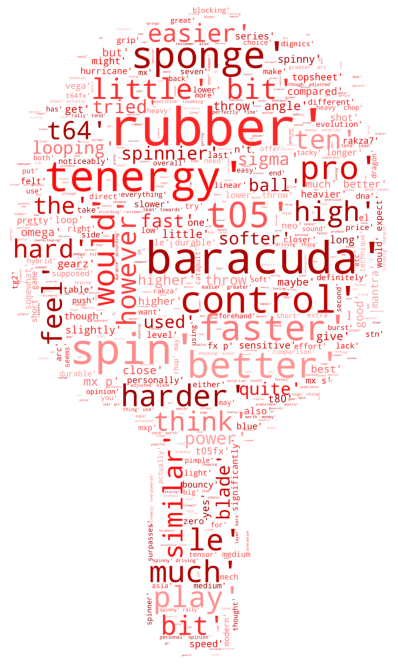

In [37]:
show_wordcloud_custom_shape(corpus_lowercase,500)

# Compare two brands

In [38]:
comp_sentences_df.head()

,id,thread_title,reply_split,classification
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,1
1,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,2
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,For my style I really prefer T64fx than T05fx ...,1
3,5f686bdbb59794ca78c7090b,Tenergy 05 vs Tenergy 80,If you loop everything and are active in the s...,2
4,5f686bdbb59794ca78c7090b,Tenergy 05 vs Tenergy 80,If you block more and are a bit more passive i...,2


In [40]:
tenegy_replies = comp_sentences_df[comp_sentences_df.thread_title.str.lower().str.contains('tenergy')].reply_split

In [41]:
baracuda_replies = comp_sentences_df[comp_sentences_df.thread_title.str.lower().str.contains('baracuda')].reply_split

In [73]:
baracuda_replies[baracuda_replies.str.lower().str.contains('fast')]

30     Tenergy is noticeably faster than Baracuda, th...
45     Tenergy is noticeably faster than Baracuda, th...
60     Tenergy is noticeably faster than Baracuda, th...
135    G1 is definitely faster than Baracuda, pretty ...
138    I tend to be aggressive when opening up off ba...
140      The main difference is that G1 is a bit faster.
Name: reply_split, dtype: object

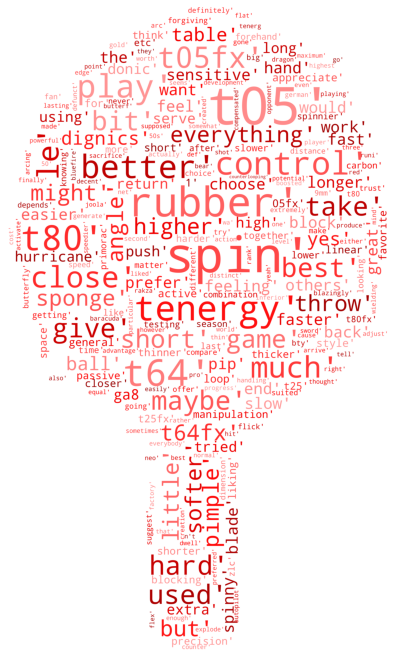

In [45]:
# https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
# code modified from blog above for customizing wordcloud

corpus_tenegy =preprocess_news(tenegy_replies, lowercase = True)
show_wordcloud_custom_shape(corpus_tenegy,500,'red')

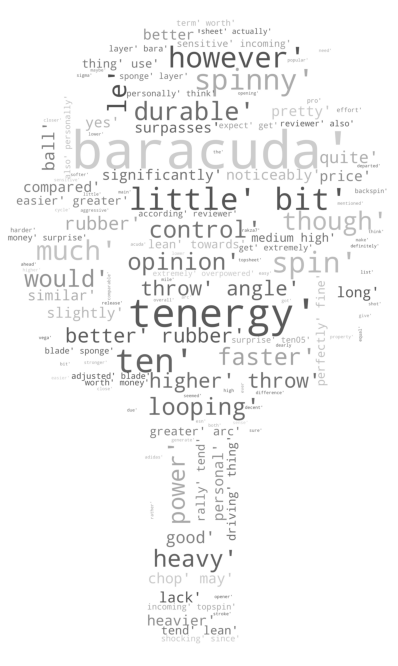

In [46]:
corpus_baracuda =preprocess_news(baracuda_replies, lowercase = True)
show_wordcloud_custom_shape(corpus_baracuda,500,'black')

- spin	-how many revolutions can a ball rotate	spinny, more spin, 
- hardness	-how thick the sponge sheet is, thicker sponge can generate more spin	soft
- requirement	-how much technical skills / force the player needs to play well with the rubber. some rubbers are so bouncy that you dont have to use much of your own force	
- overall	-general intuition which one you like	better, best, i like..., feel
- tackiness-	how sticky the top sheet is	tacky, more grip
- speed -	how fast can the ball you return be 	faster, slower
- control	-how well can you leverage the rubbe to play your game 	touch
- bounce	-when you hit a ball, how much the ball rebounces..	Jo
- throw	-the arc of the angle of your return ball	high throw, lower throw, flat
- durability	-how long can you use a rubber before replacement	durable, last longer
- "good for blocking"		
- "good for looping"		

In [53]:
def find_words_contain(df,word):
    return df['reply_split'][df['reply_split'].str.lower().str.contains(word)]

In [56]:
find_words_contain(comp_sentences_df,'spin').values

array(['On the other hand less spin too.',
       'If you loop everything and are active in the short game with spin manipulation, Tenergy 05.',
       '1) T05: Slower, More Spin, Higher Throw Angle.',
       '2) T64: Faster, Less Spin, Lower Throw Angle.',
       'T80 has a little bit more control (for me), less sensitive to spin, but T05 is spinnier.',
       "After testing Dignics 05 on a zlc blade after the end of last season I'm back to my primorac carbon this time with T80fx, that's a better combination for me as it gives me what I was looking for, so a bit more spin and control than T64fx.",
       'Tenergy 64 still has a lot of spin just not as much as 80 and 80 is was better with flicks',
       'T64 has MUCH more spin than T80…',
       'In my personal opinion, Baracuda has more spin than Tenergy, however it lacks a little bit of power and control compared to Ten.',
       'Tenergy is noticeably faster than Baracuda, though not quite as spinny.',
       'If long, spinny ralli

In [ ]:
baracuda_replies[baracuda_replies.str.lower().str.contains('fast')]

In [ ]:
spins : {'spin','more spin','spinnier','spinier','spinner'}
hards: {''}
    
    speed : faster, spinnier (has more spin, has less spin), slower, spiny
throw angle / arc: higher, lower
hardness: softer, harder, stiffer
texture: thinner, thicker, bouncy, bouncier
price: cheaper
durability: more durable
other words: throw, flex, flick, flat, springy, chopping

['softer', 'faster', 'prefer', 'better', 'longer',
 'thinner', 'rubber', 'softer', 'shorter', 'thicker', 
 'closer', 'together', 'rubber', 'harder', 'slower', 'higher',
 'faster', 'lower', 'spinnier', 'after', 'better', 'matter', 'rubber', 
 'better', 'softer', 'easier', 'better', 'higher', 'better', 'never', 
 'rubber', 'offer', 'higher', 'easier', 'greater', 'however', 'however',
 'power', 'harder', 'faster', 'better', 'rubber', 'higher', 'heavier', 
 'layer', 'reviewer', 'better', 'rubber', 'rubber', 'however', 'better',
 'power', 'higher', 'easier', 'greater', 'however', 'however', 'power', 
 'faster', 'better', 'rubber', 'higher', 'heavier', 'layer', 'reviewer', 
 'better', 'rubber', 'rubber', 'however', 'better', 'power', 'higher', 
 'easier', 'greater', 'however', 'however', 'power', 'faster', 'better', 
 'rubber', 'higher', 'heavier', 'layer', 'reviewer', 'better', 'rubber', 
 'rubber', 'however', 'better', 'power', 'either', 'rubber', 'better',
 'grippier', 'softer', 'better', 'heavier', 'harder', 'number', 'better'
 , 'easier', 'rubber', 'softer', 'easier', 'spinner', 'rubber', 'however',
 'easier', 'higher', 'prefer', 'counter', 'faster', 'spinnier', 'however', 
 'rasanter', 'easier', 'easier', 'shorter', 'lower', 'smaller', 'harder',
 'spinnier', 'slower', 'higher', 'faster/spinnier', 'better', 'lower', 'lower',
 'slower', 'better', 'rubber', 'power', 'lower', 'faster', 'harder', 'lower',
 'power', 'proper', 'better', 'rubber', 'easier', 'rubber', 'either',
 'spinnier', 'rubber', 'better', 'better', 'longer', 'altogether', 
 'faster', 'rubber', 'power', 'offer', 'better', 'faster', 'lesser', 'fster', 'rubber', 'lesser', 'rubber', 'bouncier', 'offer', 'rubber', 'never', 'better', 'softer', 'better', 'however', 'cheaper', 'booster', 'better', 'cheaper', 'faster', 'stronger', 'faster', 'softer', 'opener', 'higher', 'easier', 'faster', 'rubber', 'rather', 'closer', 'spinnier', 'harder', 'faster', 'better', 'spinnier', 'better', 'booster', 'better', 'player', 'speedier', 'rather', 'rubber', 'rubber', 'rubber', '+longer', 'rubber', 'rubber', 'closer', 'rubber', 'higher', 'easier', 'rubber', 'faster', 'rubber', 'retriever', 'allrounder', 'easier', 'rubber', 'rubber', 'harder', 'number', 'rubber', 'rubber', 'rasanter', 'rubber', 'better', 'longer', 'harder', 'closer', 'rubber', 'player', 'rubber', 'rubber', 'newer', 'harder', 'hammer', 'harder', 'harder', 'larger', 'rubber', 'harder', 'sriver', 'softer', 'hammer', 'hammer', 'bouncier', 'spinner', 'either', 'faster', 'harder', 'older', 'gambler', 'rubber', 'stiffer', 'faster', 'faster', 'faster', 'slower', 'another', 'harder', 'faster', 'higher', 'heavier', 'rubber', 'higher', 'rubber', 'harder', 'heavier', 'either', 'rubber', 'spinnier', 'spinnier', 'rubber', 'lower', 'harder', 'rubber', 'higher', 'easier', 'lower', 'rubber', 'faster', 'spinner', 'longer', 'lower', 'higher', 'spinnier', 'consider', 'slower', 'faster', 'faster', 'rubber', 'faster', 'rubber', 'better', 'softer']

# others

In [65]:
tag_lists = ['NN','IN','NNP','JJ','RB','DT','PRP','VBZ','JJR','JJS','RBR','RBS']

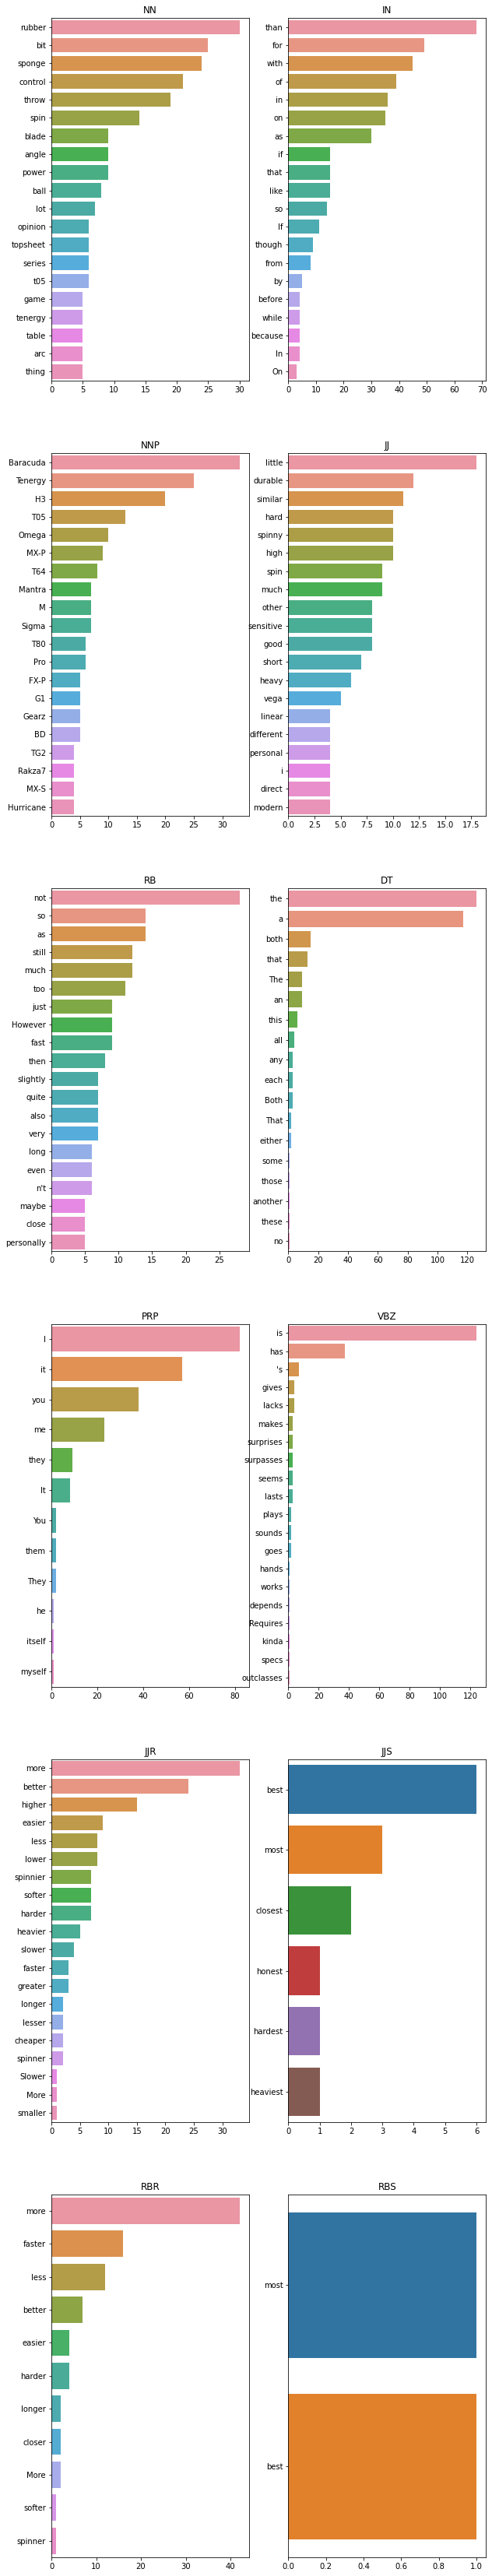

In [66]:
f, axes = plt.subplots(6, 2,figsize=(10,60))
for idx,tagged in enumerate(tag_lists):

    plot_top_tagged(comp_sentences_df['reply_split'],tagged=tagged,i=idx)

In [67]:
#  RBR is useful, JJR also useful

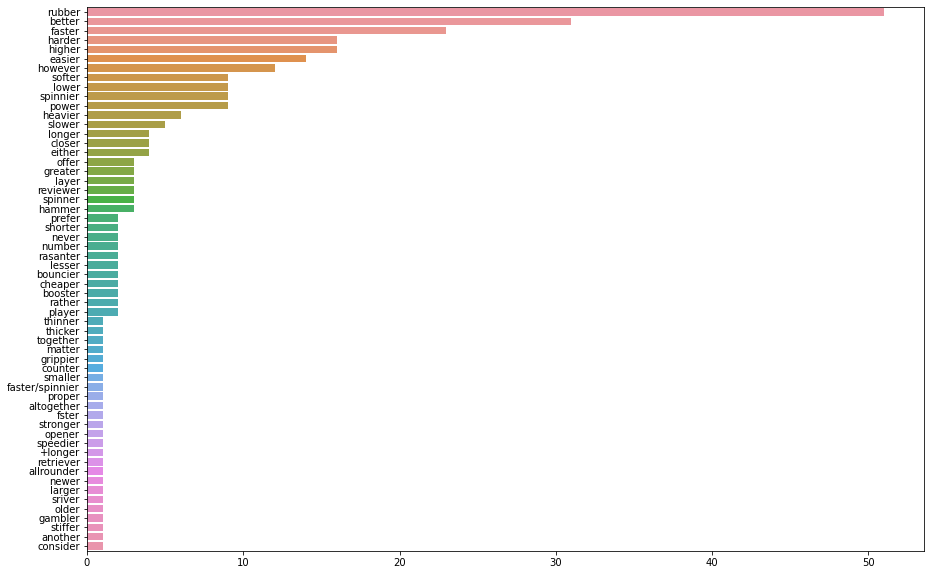

In [70]:
# looking at the top word that is NOT a stopword

from collections import Counter
import seaborn as sns

counter=Counter(er_list)
most=counter.most_common()

x, y= [], []
for word,count in most[:100]:
    if (word not in custom_stop):
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(15,10))
ax = sns.barplot(x=y,y=x)

* speed : faster, spinnier (has more spin, has less spin), slower, spiny
* throw angle / arc: higher, lower
* hardness: softer, harder, stiffer
* texture: thinner, thicker, bouncy, bouncier
* price: cheaper
* durability: more durable

* other words: throw, flex, flick, flat, springy, chopping